In [52]:
%matplotlib inline
import pandas as pd
import pygeoj
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

file1 = "listings.csv"
file2 = "calendar.csv"
file3 = "reviews.csv"
file4 = "neighbourhoods.csv"
file5 = "listings_2018.csv"
file6 = "listings_2017.csv"
file7 = "listings_2016.csv"
file8 = "listings_2015.csv"
listings = pd.read_csv(file1)
listings_2018 = pd.read_csv(file5)
listings_2017 = pd.read_csv(file6)
listings_2016 = pd.read_csv(file7)
listings_2015 = pd.read_csv(file8)
calendar = pd.read_csv(file2)
reviews = pd.read_csv(file3)
neighbourhoods = pd.read_csv(file4)


In [53]:
pd.set_option('display.max_columns', None)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20191014170858,2019-10-14,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,2 months ago,t,3,8,16,85,2019-10-14,217,52,2009-07-23,2019-09-21,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,20191014170858,2019-10-14,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,NaN,NaN,https://a0.muscache.com/im/pictures/b6e97d2a-1...,NaN,4921,https://www.airbnb.com/users/show/4921,Kevin,2008-12-08,"San Francisco, California, United States",I am a retired software developer now raising .

In [54]:
#Cleaning listings.csv
listings1 = listings.drop(['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered',
                           'neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url',
                           'medium_url','picture_url','xl_picture_url','thumbnail_url','medium_url','xl_picture_url',
                           'host_acceptance_rate','host_thumbnail_url','neighbourhood_group_cleansed','square_feet',
                           'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','require_guest_profile_picture','host_about',
                           'host_response_time','host_response_rate','host_picture_url','host_verifications','host_has_profile_pic',
                           'market','smart_location','country_code','country','require_guest_phone_verification','bed_type',
                           'amenities','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication','review_scores_location','review_scores_value','requires_license',
                           'jurisdiction_names','license','is_business_travel_ready'],axis=1)
listings1.head()

,id,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",t,Duboce Triangle,1.0,1.0,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,2 months ago,t,3,8,16,85,2019-10-14,217,52,2009-07-23,2019-09-21,97.0,f,moderate,1,1,0,0,1.74
1,3850,4921,https://www.airbnb.com/users/show/4921,Kevin,2008-12-08,"San Francisco, California, United States",t,Inner Sunset,2.0,2.0,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,San Francisco,CA,94131,37.75402,-122.45805,t,House,Private room,2,1.0,1.0,1.0,$99.00,NaN,NaN,$0.00,$10.00,2,$20.00,1,5,3 days ago,t,5,32,62,62,2019-10-14,160,36,2009-07-16,2019-09-30,94.0,f,strict_14_with_grace_period,3,0,3,0,1.28
2,5858,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",f,Bernal Heights,2.0,2.0,t,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,San Francisco,CA,94110,37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,$235.00,"$1,600.00","$5,500.00",NaN,$100.00,2,$0.00,30,60,3 weeks ago,t,0,0,0,0,2019-10-14,111,0,2009-05-03,2017-08-06,98.0,f,strict_14_with_grace_period,1,1,0,0,0.87
3,7918,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",t,Cole Valley,10.0,10.0,t,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,37.76669,-122.45250,t,Apartment,Private room,2,4.0,1.0,1.0,$65.00,$485.00,"$1,685.00",$200.00,$50.00,1,$12.00,32,60,3 months ago,t,30,60,90,365,2019-10-14,18,1,2009-08-31,2019-09-10,86.0,f,strict_14_with_grace_period,9,0,9,0,0.15
4,8142,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",t,Cole Valley,10.0,10.0,t,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,37.76487,-122.45183,t,Apartment,Private room,2,4.0,1.0,1.0,$65.00,$490.00,"$1,685.00",$200.00,$50.00,1,$12.00,32,90,3 months ago,t,30,60,90,365,2019-10-14,8,0,2014-09-08,2018-09-12,93.0,f,strict_14_with_grace_period,9,0,9,0,0.13


In [ ]:
# listings1.rename(columns={"A": "a", "B": "c"})

In [55]:
values = {'weekly_price': 0, 'monthly_price': 0, 'security_deposit': 0, 'cleaning_fee': 0, 'review_scores_rating': 0,
          'reviews_per_month': 0}
listings1.fillna(value=values).head()

,id,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",t,Duboce Triangle,1.0,1.0,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,2 months ago,t,3,8,16,85,2019-10-14,217,52,2009-07-23,2019-09-21,97.0,f,moderate,1,1,0,0,1.74
1,3850,4921,https://www.airbnb.com/users/show/4921,Kevin,2008-12-08,"San Francisco, California, United States",t,Inner Sunset,2.0,2.0,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,San Francisco,CA,94131,37.75402,-122.45805,t,House,Private room,2,1.0,1.0,1.0,$99.00,0,0,$0.00,$10.00,2,$20.00,1,5,3 days ago,t,5,32,62,62,2019-10-14,160,36,2009-07-16,2019-09-30,94.0,f,strict_14_with_grace_period,3,0,3,0,1.28
2,5858,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",f,Bernal Heights,2.0,2.0,t,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,San Francisco,CA,94110,37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,$235.00,"$1,600.00","$5,500.00",0,$100.00,2,$0.00,30,60,3 weeks ago,t,0,0,0,0,2019-10-14,111,0,2009-05-03,2017-08-06,98.0,f,strict_14_with_grace_period,1,1,0,0,0.87
3,7918,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",t,Cole Valley,10.0,10.0,t,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,37.76669,-122.45250,t,Apartment,Private room,2,4.0,1.0,1.0,$65.00,$485.00,"$1,685.00",$200.00,$50.00,1,$12.00,32,60,3 months ago,t,30,60,90,365,2019-10-14,18,1,2009-08-31,2019-09-10,86.0,f,strict_14_with_grace_period,9,0,9,0,0.15
4,8142,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",t,Cole Valley,10.0,10.0,t,"San Francisco, CA, United States",Cole Valley,Haight Ashbury,San Francisco,CA,94117,37.76487,-122.45183,t,Apartment,Private room,2,4.0,1.0,1.0,$65.00,$490.00,"$1,685.00",$200.00,$50.00,1,$12.00,32,90,3 months ago,t,30,60,90,365,2019-10-14,8,0,2014-09-08,2018-09-12,93.0,f,strict_14_with_grace_period,9,0,9,0,0.13


In [66]:
listings2 = listings1[['host_id','price','room_type','availability_365']]
listings2.head()

,host_id,price,room_type,availability_365
0,1169,$170.00,Entire home/apt,85
1,4921,$99.00,Private room,62
2,8904,$235.00,Entire home/apt,0
3,21994,$65.00,Private room,365
4,21994,$65.00,Private room,365


In [68]:
listings2['price'] = listings2['price'].map(lambda x: x.lstrip('')[1:])
def convert_to_int(price):
    try:
        return float(price.replace(",",""))
    except:
        return float(price)
    
listings2["price"] = listings2["price"].apply(convert_to_int)
    
listings2.head()

C:\Users\chath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chath\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,host_id,price,room_type,availability_365
0,1169,170.0,Entire home/apt,85
1,4921,99.0,Private room,62
2,8904,235.0,Entire home/apt,0
3,21994,65.0,Private room,365
4,21994,65.0,Private room,365


In [69]:
listings2.price.mean()

225.40710146714338

In [72]:
#Data for 2019   
price_mean_19 = listings2.loc[listings2['room_type']=='Entire home/apt']['price'].mean()
price_mean1_19 = listings2.loc[listings2['room_type']=='Private room']['price'].mean()
price_mean2_19 = listings2.loc[listings2['room_type']=='Shared room']['price'].mean()

av_mean_19 = listings2.loc[listings2['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_19 = listings2.loc[listings2['room_type']=='Private room']['availability_365'].mean()
av_mean2_19 = listings2.loc[listings2['room_type']=='Shared room']['availability_365'].mean()

In [ ]:
listings_2018.head()

In [73]:
price_mean_18 = listings_2018.loc[listings_2018['room_type']=='Entire home/apt']['price'].mean()
price_mean1_18 = listings_2018.loc[listings_2018['room_type']=='Private room']['price'].mean()
price_mean2_18 = listings_2018.loc[listings_2018['room_type']=='Shared room']['price'].mean()

av_mean_18 = listings_2018.loc[listings_2018['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_18 = listings_2018.loc[listings_2018['room_type']=='Private room']['availability_365'].mean()
av_mean2_18 = listings_2018.loc[listings_2018['room_type']=='Shared room']['availability_365'].mean()


In [74]:
price_mean_17 = listings_2017.loc[listings_2017['room_type']=='Entire home/apt']['price'].mean()
price_mean1_17 = listings_2017.loc[listings_2017['room_type']=='Private room']['price'].mean()
price_mean2_17 = listings_2017.loc[listings_2017['room_type']=='Shared room']['price'].mean()

av_mean_17 = listings_2017.loc[listings_2017['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_17 = listings_2017.loc[listings_2017['room_type']=='Private room']['availability_365'].mean()
av_mean2_17 = listings_2017.loc[listings_2017['room_type']=='Shared room']['availability_365'].mean()


In [75]:
price_mean_16 = listings_2016.loc[listings_2016['room_type']=='Entire home/apt']['price'].mean()
price_mean1_16 = listings_2016.loc[listings_2016['room_type']=='Private room']['price'].mean()
price_mean2_16 = listings_2016.loc[listings_2016['room_type']=='Shared room']['price'].mean()

av_mean_16 = listings_2016.loc[listings_2016['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_16 = listings_2016.loc[listings_2016['room_type']=='Private room']['availability_365'].mean()
av_mean2_16 = listings_2016.loc[listings_2016['room_type']=='Shared room']['availability_365'].mean()


In [76]:
price_mean_15 = listings_2015.loc[listings_2015['room_type']=='Entire home/apt']['price'].mean()
price_mean1_15 = listings_2015.loc[listings_2015['room_type']=='Private room']['price'].mean()
price_mean2_15 = listings_2015.loc[listings_2015['room_type']=='Shared room']['price'].mean()

av_mean_15 = listings_2015.loc[listings_2015['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_15 = listings_2015.loc[listings_2015['room_type']=='Private room']['availability_365'].mean()
av_mean2_15 = listings_2015.loc[listings_2015['room_type']=='Shared room']['availability_365'].mean()


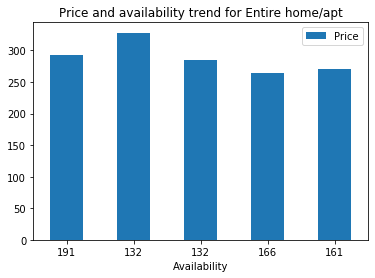

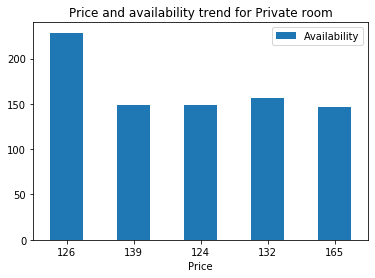

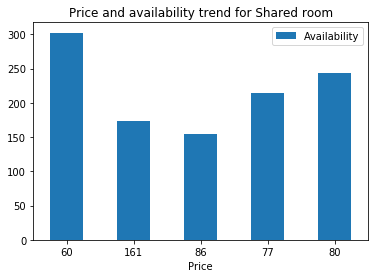

In [79]:
df_entire_home_apt = pd.DataFrame({'Price':[int(price_mean_15),int(price_mean_16),int(price_mean_17),int(price_mean_18),int(price_mean_19)],
                        'Availability':[int(av_mean_15),int(av_mean_16),int(av_mean_17),int(av_mean_18),int(av_mean_19)]})
df_private_room = pd.DataFrame({'Price':[int(price_mean1_15),int(price_mean1_16),int(price_mean1_17),int(price_mean1_18),int(price_mean1_19)],
                        'Availability':[av_mean1_15,av_mean1_16,av_mean1_17,av_mean1_18,int(av_mean1_19)]})
df_shared_room = pd.DataFrame({'Price':[int(price_mean2_15),int(price_mean2_16),int(price_mean2_17),int(price_mean2_18),int(price_mean2_19)],
                        'Availability':[av_mean2_15,av_mean2_16,av_mean2_17,av_mean2_18,int(av_mean2_19)]})

ax = df_entire_home_apt.plot(kind = 'bar', x='Availability', y='Price',rot=0, title= 'Price and availability trend for Entire home/apt')
ax1= df_private_room.plot(kind ='bar', x='Price', y='Availability', rot=0,title= 'Price and availability trend for Private room')
ax2= df_shared_room.plot(kind ='bar', x='Price', y='Availability', rot=0,title= 'Price and availability trend for Shared room')


In [80]:
listings_entire = listings1.loc[listings['room_type']=='Entire home/apt']
listings_private = listings1.loc[listings['room_type']=='Entire home/apt']
listings_shared = listings1.loc[listings['room_type']=='Entire home/apt']

coordinates_entire = listings_entire[['latitude','longitude']].apply(tuple, axis=1)
coordinates_private = listings_entire[['latitude','longitude']].apply(tuple, axis=1)
coordinates_shared = listings_entire[['latitude','longitude']].apply(tuple, axis=1)

In [81]:
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '2px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
fig

Figure(layout=FigureLayout(border='2px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [ ]:
location_entire = gmaps.symbol_layer(coordinates_entire,fill_color='red',stroke_color='red',scale=1)
location_private = gmaps.symbol_layer(coordinates_private,fill_color='green',stroke_color='green',scale=1)
location_shared = gmaps.symbol_layer(coordinates_shared,fill_color='blue',stroke_color='blue',scale=1)
fig.add_layer(location_entire)
fig.add_layer(location_private)
fig.add_layer(location_shared)
fig

In [ ]:
# t = listings['room_type'].count()
# x = listings.loc[listings['room_type']=='Entire home/apt']
# y = listings.loc[listings['room_type']=='Private room']
# z = listings.loc[listings['room_type']=='Shared room']
# per_entire_home = x['room_type'].count()/t*100
# per_
# per_entire_home

In [ ]:
# listings1['host_is_superhost'].value_counts()
# listings1['host_id'].nunique()
# listings['host_identity_verified'].value_counts()
